<a href="https://colab.research.google.com/github/AlternateEconomy/InvestmentAnalytics-iNeuronInternship/blob/main/FDI_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Firing up colab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/FDI_in_India.csv')
df.head(3)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98


In [3]:
len(df)

63

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


2. Setting the index and subsequent

In [5]:
df.set_index('Sector', inplace = True)

Year-wise Investment

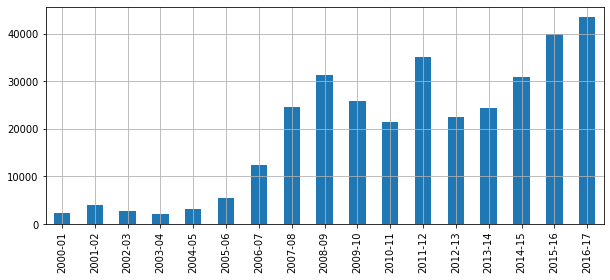

In [14]:
df.sum(axis=0).plot(kind='bar', figsize=(10,4))
plt.grid()
plt.show()

sector-wise total investment over the years

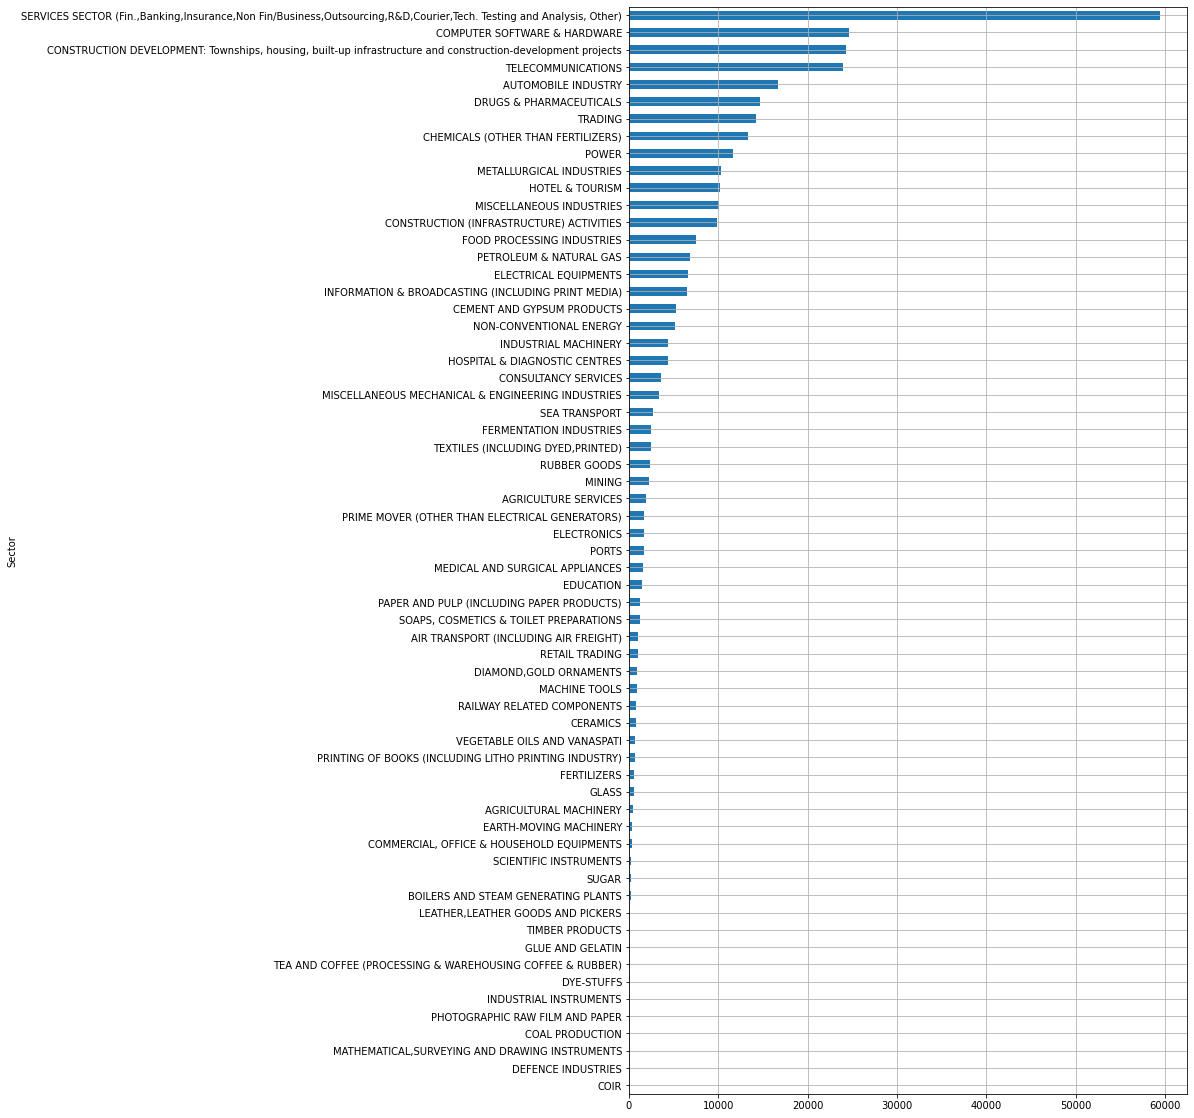

In [15]:
df.sum(axis=1).sort_values().plot(kind = 'barh', figsize=(10,20))
plt.grid()
plt.show()

finding trends

a. correlation

In [22]:
import numpy as np

new = df.transpose()
corrMatrix=new.corr()

corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) # borrowed from Karl D's answer

already_in = set()
result = []
for col in corrMatrix:
    perfect_corr = corrMatrix[col][corrMatrix[col] >= 0.9].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

result

[['TELECOMMUNICATIONS',
  'TEXTILES (INCLUDING DYED,PRINTED)',
  'GLUE AND GELATIN',
  'ELECTRICAL EQUIPMENTS'],
 ['TRADING', 'AUTOMOBILE INDUSTRY'],
 ['SUGAR',
  'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
  'AIR TRANSPORT (INCLUDING AIR FREIGHT)'],
 ['RETAIL TRADING', 'SEA TRANSPORT'],
 ['SOAPS, COSMETICS & TOILET PREPARATIONS', 'INDUSTRIAL MACHINERY'],
 ['DEFENCE INDUSTRIES', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'],
 ['TEXTILES (INCLUDING DYED,PRINTED)', 'MEDICAL AND SURGICAL APPLIANCES'],
 ['GLASS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'],
 ['DIAMOND,GOLD ORNAMENTS', 'DYE-STUFFS'],
 ['FOOD PROCESSING INDUSTRIES', 'FERMENTATION INDUSTRIES']]

Above we set the correlation coefficient score to 0.9.

Now that we plot them to observe price trends.

In [24]:
X = list(df.columns)
#X.remove('Sector')
X 

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17']

In [19]:
norm_df=(df-df.mean())/df.std()
norm_df.head(2)

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,-0.134256,-0.315379,-0.072924,-0.393441,1.464559,0.296446,-0.041268,0.765568,0.406814,0.010585,1.209817,1.191176,1.426953,0.276304,-0.157104,-0.133772,0.531209
MINING,-0.324673,-0.363644,-0.379483,-0.166255,-0.403888,-0.390107,-0.279072,0.052886,-0.409103,-0.254279,-0.414426,-0.402165,-0.383040,-0.566459,0.230882,-0.085573,-0.449289


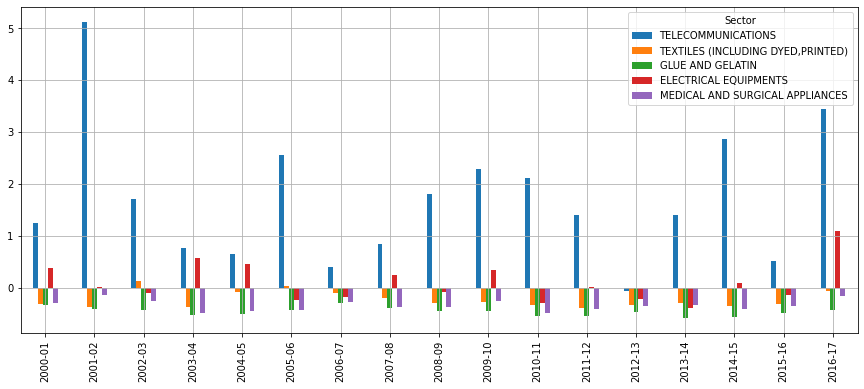

In [43]:
df_1 = norm_df.loc[['TELECOMMUNICATIONS',
  'TEXTILES (INCLUDING DYED,PRINTED)',
  'GLUE AND GELATIN',
  'ELECTRICAL EQUIPMENTS','MEDICAL AND SURGICAL APPLIANCES'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()
#df_1

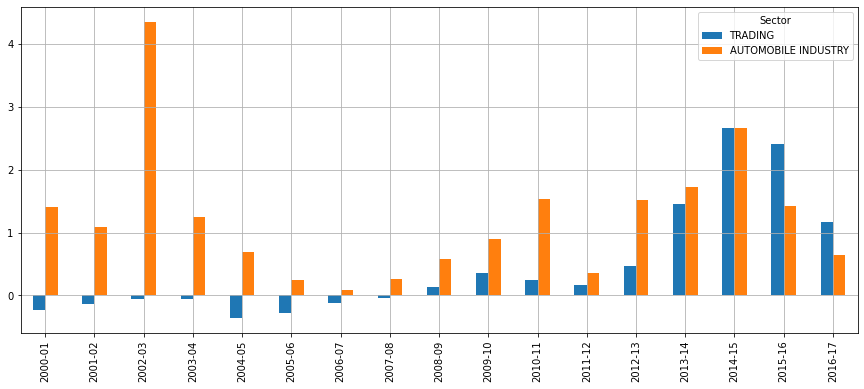

In [45]:
df_1 = norm_df.loc[['TRADING', 'AUTOMOBILE INDUSTRY'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()
#df_1

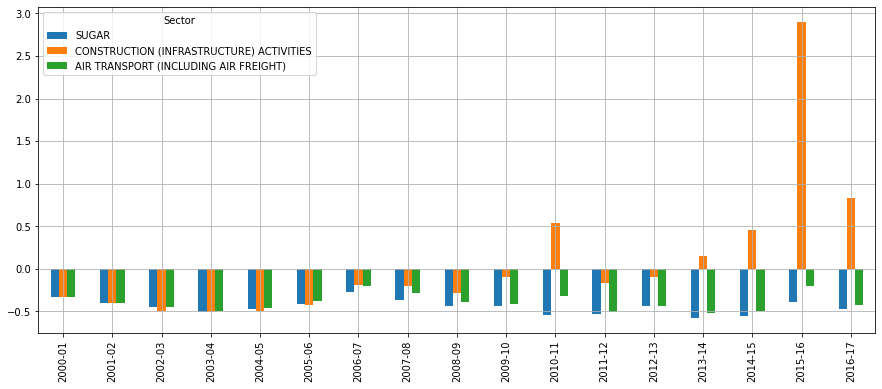

In [46]:
df_1 = norm_df.loc[['SUGAR',
  'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
  'AIR TRANSPORT (INCLUDING AIR FREIGHT)'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

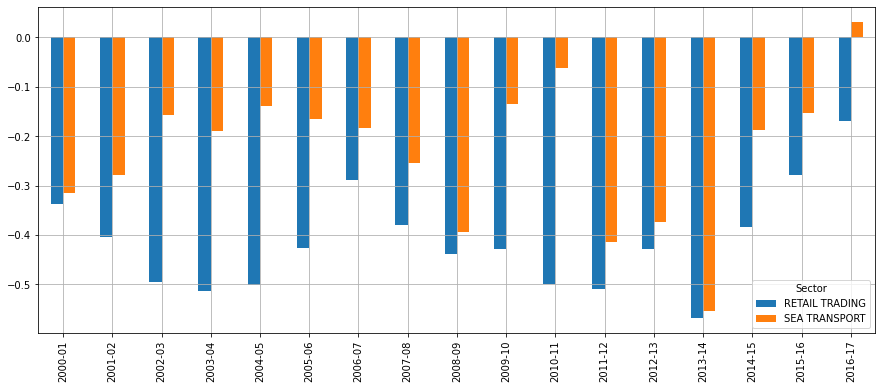

In [47]:
df_1 = norm_df.loc[['RETAIL TRADING', 'SEA TRANSPORT'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

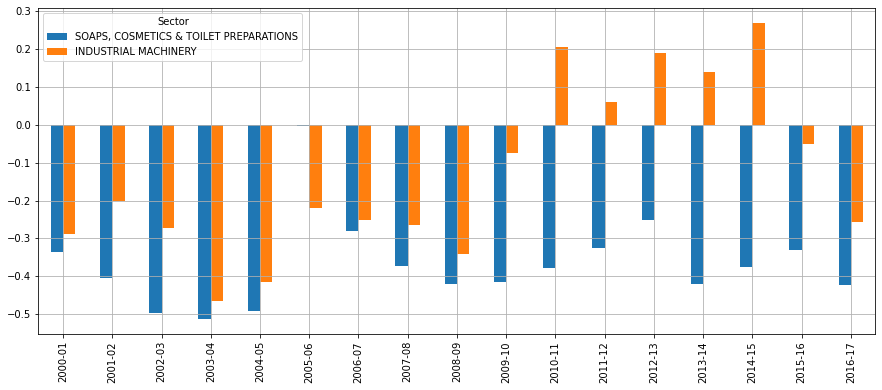

In [48]:
df_1 = norm_df.loc[['SOAPS, COSMETICS & TOILET PREPARATIONS', 'INDUSTRIAL MACHINERY'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

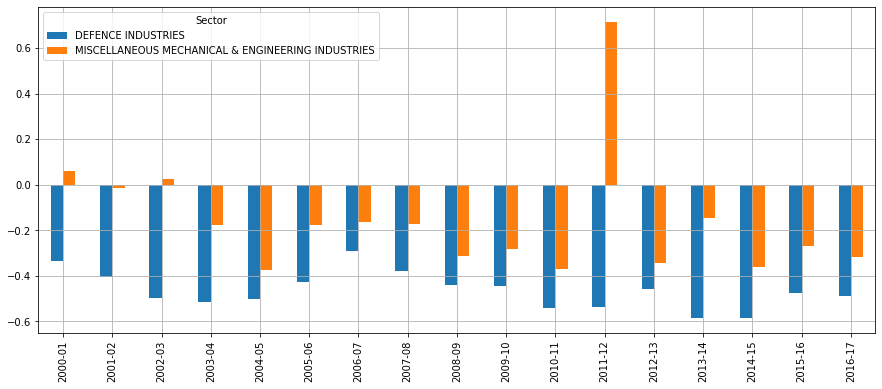

In [49]:
df_1 = norm_df.loc[['DEFENCE INDUSTRIES', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

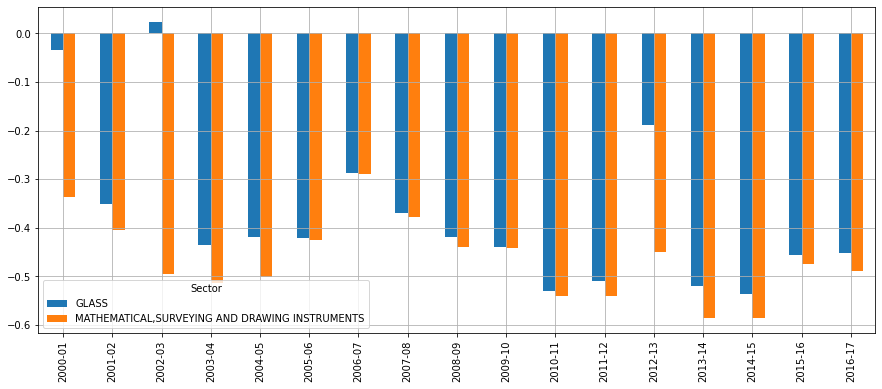

In [50]:
df_1 = norm_df.loc[['GLASS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

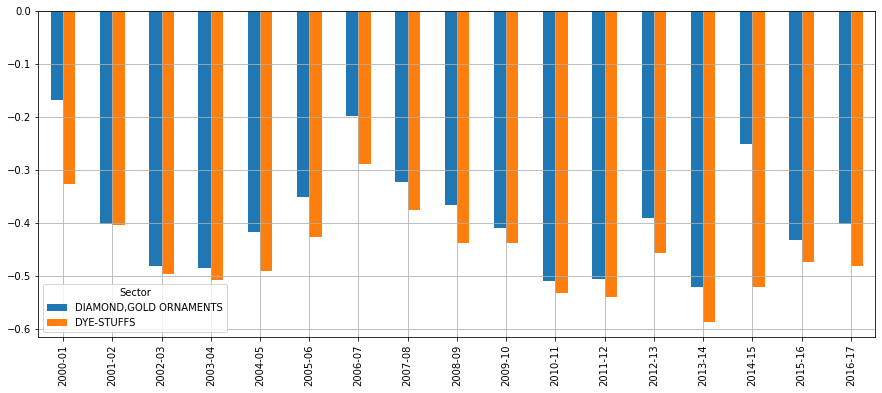

In [51]:
df_1 = norm_df.loc[['DIAMOND,GOLD ORNAMENTS', 'DYE-STUFFS'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

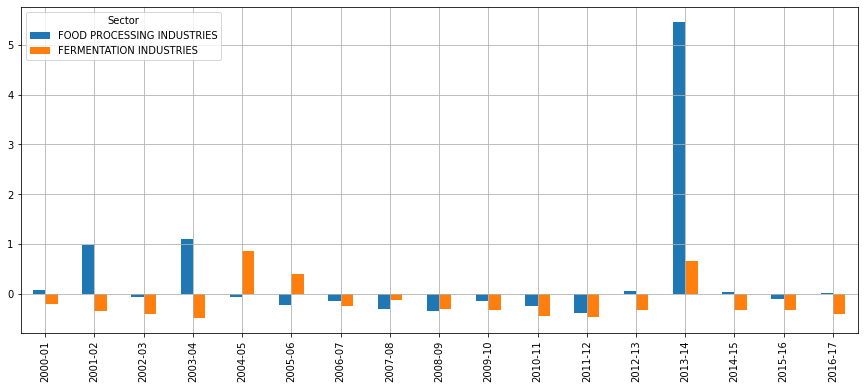

In [52]:
df_1 = norm_df.loc[['FOOD PROCESSING INDUSTRIES', 'FERMENTATION INDUSTRIES'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

Top and bottom sectors invested in.

In [65]:
s = df.sum(axis=1).sort_values(ascending=True)
s.head(10)

Sector
COIR                                                           4.06
DEFENCE INDUSTRIES                                             5.12
MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS                 7.98
COAL PRODUCTION                                               27.74
PHOTOGRAPHIC RAW FILM AND PAPER                               67.28
INDUSTRIAL INSTRUMENTS                                        76.12
DYE-STUFFS                                                    88.40
TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)    111.22
GLUE AND GELATIN                                             128.39
TIMBER PRODUCTS                                              157.68
dtype: float64

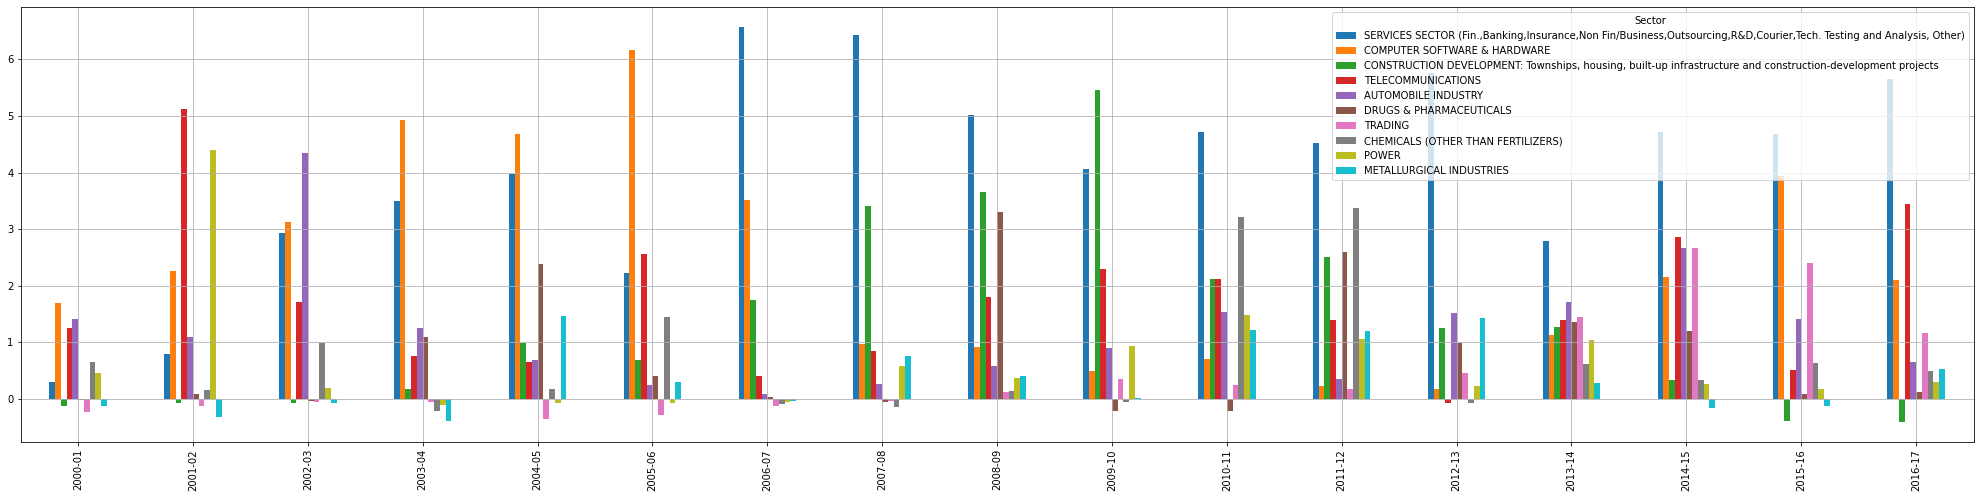

In [61]:
df_1 = norm_df.loc[['SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)',
'COMPUTER SOFTWARE & HARDWARE',                                                                                        
'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects',      
'TELECOMMUNICATIONS',                                                                                                   
'AUTOMOBILE INDUSTRY',                                                                                                  
'DRUGS & PHARMACEUTICALS',                                                                                                
'TRADING',                                                                                                                
'CHEMICALS (OTHER THAN FERTILIZERS)',                                                                                     
'POWER',                                                                                                                  
'METALLURGICAL INDUSTRIES'   ], X]
df_1.transpose().plot(kind = 'bar', figsize=(35,8))
plt.grid()
plt.show()

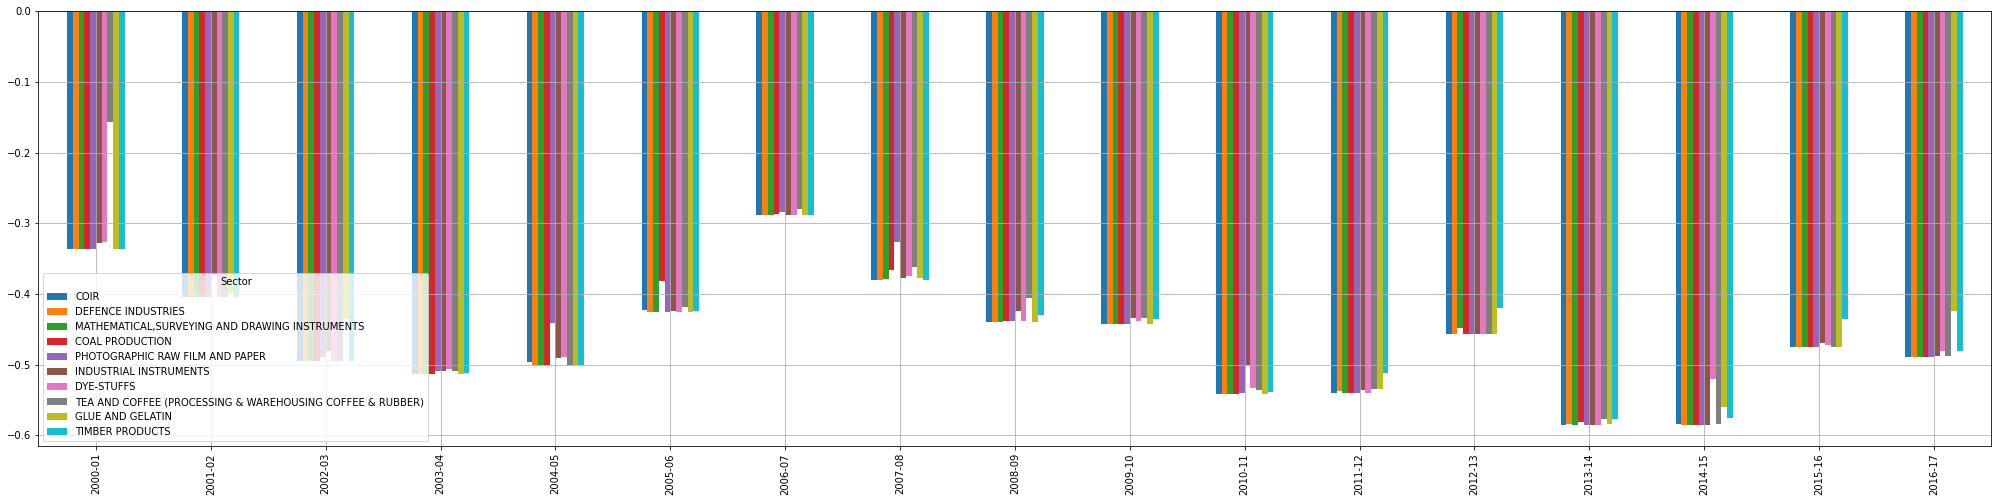

In [66]:
df_1 = norm_df.loc[['COIR',                                                     
'DEFENCE INDUSTRIES',                                            
'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS',                 
'COAL PRODUCTION',                                               
'PHOTOGRAPHIC RAW FILM AND PAPER',                            
'INDUSTRIAL INSTRUMENTS',                                 
'DYE-STUFFS',                                            
'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)',  
'GLUE AND GELATIN',                                      
'TIMBER PRODUCTS'], X]
df_1.transpose().plot(kind = 'bar', figsize=(35,8))
plt.grid()
plt.show()

In [70]:
df.idxmax()

2000-01                             MISCELLANEOUS INDUSTRIES
2001-02                                   TELECOMMUNICATIONS
2002-03                                  AUTOMOBILE INDUSTRY
2003-04                         COMPUTER SOFTWARE & HARDWARE
2004-05                         COMPUTER SOFTWARE & HARDWARE
2005-06                         COMPUTER SOFTWARE & HARDWARE
2006-07    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2007-08    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2008-09    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2009-10    CONSTRUCTION DEVELOPMENT: Townships, housing, ...
2010-11    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2011-12    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2012-13    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2013-14                           FOOD PROCESSING INDUSTRIES
2014-15    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2015-16    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2016-17    SERVICES SECT

In [71]:
df.idxmin()

2000-01                           NON-CONVENTIONAL ENERGY
2001-02                           NON-CONVENTIONAL ENERGY
2002-03                                   COAL PRODUCTION
2003-04    PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)
2004-05                                   COAL PRODUCTION
2005-06               BOILERS AND STEAM GENERATING PLANTS
2006-07                                             PORTS
2007-08                            SCIENTIFIC INSTRUMENTS
2008-09               BOILERS AND STEAM GENERATING PLANTS
2009-10                                   COAL PRODUCTION
2010-11                                   COAL PRODUCTION
2011-12                                   COAL PRODUCTION
2012-13                                   COAL PRODUCTION
2013-14    MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS
2014-15                                   COAL PRODUCTION
2015-16                                   COAL PRODUCTION
2016-17                                   COAL PRODUCTION
dtype: object